#0- Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from collections import Counter
import matplotlib.pyplot as plt

#1- Class Distribution

In [2]:
def check_class_distribution(y):
    """Check the class distribution of a target variable."""
    class_counts = Counter(y)
    print("Class distribution:")
    for class_label, count in class_counts.items():
        print(f"Class {class_label}: {count} samples ({count/len(y)*100:.2f}%)")
    return class_counts

In [3]:
def plot_class_distribution(class_counts, title="Class Distribution"):
    """Plot the class distribution."""
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    for i, count in enumerate(class_counts.values()):
        plt.text(i, count + 0.1, str(count), ha='center')
    plt.tight_layout()
    plt.savefig(f"{title.lower().replace(' ', '_')}.png")
    plt.close()

#2- Random Oversampling minority

In [4]:
def random_oversampling(X, y, random_state=42):
    """Apply random oversampling to the minority class."""
    ros = RandomOverSampler(random_state=random_state)
    X_resampled, y_resampled = ros.fit_resample(X, y)
    return X_resampled, y_resampled

#3- Random oversampling majority

In [5]:
def random_undersampling(X, y, random_state=42):
    """Apply random undersampling to the majority class."""
    rus = RandomUnderSampler(random_state=random_state)
    X_resampled, y_resampled = rus.fit_resample(X, y)
    return X_resampled, y_resampled

#4- Smote Oversampling

In [6]:
def smote_oversampling(X, y, random_state=42):
    """Apply SMOTE oversampling to the minority class."""
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

#5- SMote tomek sampling

In [7]:
def smote_tomek_sampling(X, y, random_state=42):
    """Apply SMOTE-Tomek hybrid sampling."""
    smote_tomek = SMOTETomek(random_state=random_state)
    X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
    return X_resampled, y_resampled

#6- Smote Ennn sampling

In [8]:
def smote_enn_sampling(X, y, random_state=42):
    """Apply SMOTE-ENN hybrid sampling."""
    smote_enn = SMOTEENN(random_state=random_state)
    X_resampled, y_resampled = smote_enn.fit_resample(X, y)
    return X_resampled, y_resampled

#7- balanced class weights

In [9]:
def balanced_class_weights(y):
    """Calculate balanced class weights."""
    class_counts = Counter(y)
    n_samples = len(y)
    weights = {class_label: n_samples / (len(class_counts) * count)
               for class_label, count in class_counts.items()}
    return weights


#8- apply

In [10]:
def apply_data_balancing(X, y, method='smote', random_state=42):
    """Apply a specified data balancing method."""
    print(f"Applying {method} balancing...")

    if method == 'random_oversampling':
        X_resampled, y_resampled = random_oversampling(X, y, random_state)
    elif method == 'random_undersampling':
        X_resampled, y_resampled = random_undersampling(X, y, random_state)
    elif method == 'smote':
        X_resampled, y_resampled = smote_oversampling(X, y, random_state)
    elif method == 'smote_tomek':
        X_resampled, y_resampled = smote_tomek_sampling(X, y, random_state)
    elif method == 'smote_enn':
        X_resampled, y_resampled = smote_enn_sampling(X, y, random_state)
    else:
        raise ValueError(f"Unknown balancing method: {method}")

    print(f"Original dataset shape: {Counter(y)}")
    print(f"Resampled dataset shape: {Counter(y_resampled)}")

    return X_resampled, y_resampled


In [13]:
def compare_distributions(distributions, title="Comparison of Class Distributions"):
    """
    Compare multiple class distributions

    Parameters:
    -----------
    distributions : dict
        Dictionary of dictionaries, where keys are method names and values are class distributions
    title : str
        Plot title
    """
    plt.figure(figsize=(12, 8))

    methods = list(distributions.keys())
    classes = sorted(list(next(iter(distributions.values())).keys()))

    x = np.arange(len(methods))
    width = 0.8 / len(classes)

    for i, class_label in enumerate(classes):
        counts = [distributions[method].get(class_label, 0) for method in methods]
        plt.bar(x + i * width, counts, width, label=f'Class {class_label}')

    plt.xlabel('Method')
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(x + width * (len(classes) - 1) / 2, methods, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

#9- test

Dataset loaded successfully!
Dataset shape: (1140, 7)

First few rows:
   Unnamed: 0            tweet_id  \
0           0  316669998137483264   
1           1  319090866545385472   
2           2  322030931022065664   
3           3  322694830620807168   
4           4  328524426658328576   

                                                text  science_related  \
0  Knees are a bit sore. i guess that's a sign th...                0   
1          McDonald's breakfast stop then the gym 🏀💪                0   
2  Can any Gynecologist with Cancer Experience ex...                1   
3  Couch-lock highs lead to sleeping in the couch...                1   
4  Does daily routine help prevent problems with ...                1   

   scientific_claim  scientific_reference  scientific_context  
0               0.0                   0.0                 0.0  
1               0.0                   0.0                 0.0  
2               1.0                   0.0                 0.0  
3          

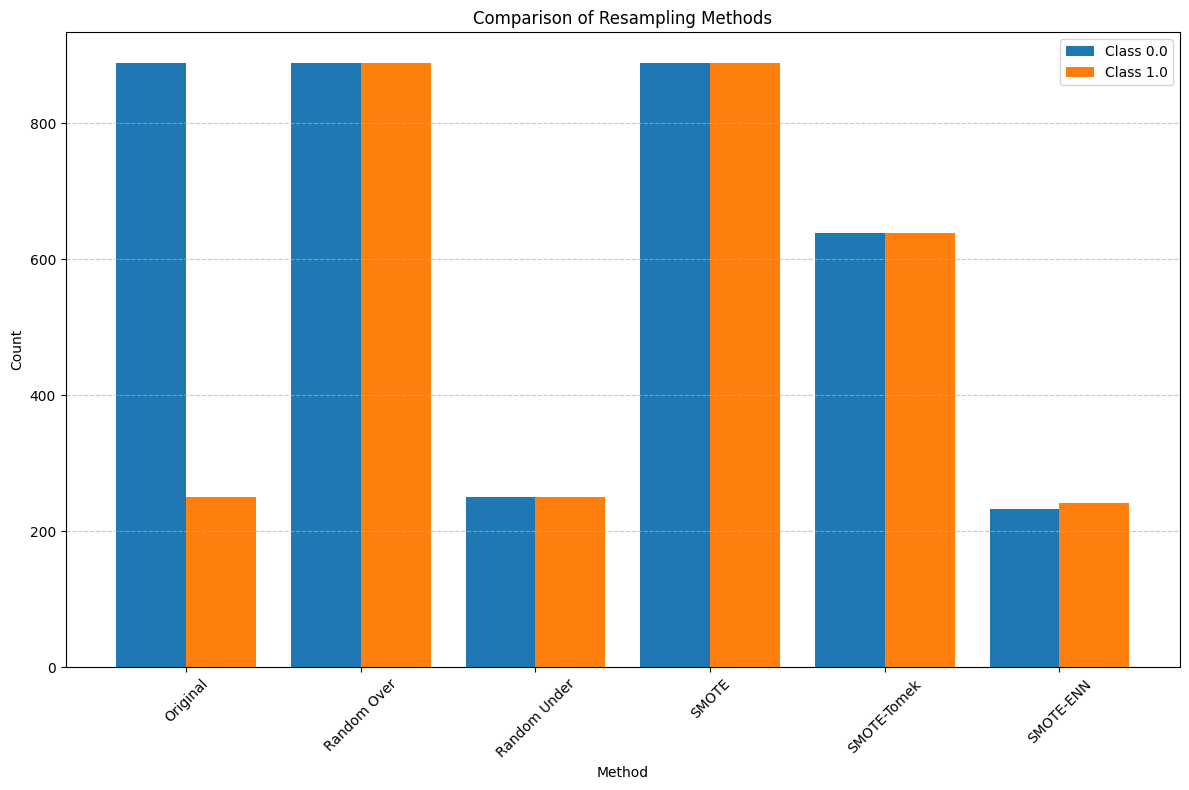


Testing generic balancing function with SMOTE:
Applying smote balancing...
Original dataset shape: Counter({np.float64(0.0): 889, np.float64(1.0): 251})
Resampled dataset shape: Counter({np.float64(0.0): 889, np.float64(1.0): 889})

Resampled DataFrame (using SMOTE):
   Unnamed: 0      tweet_id  science_related  scientific_claim  \
0         0.0  3.166700e+17              0.0               0.0   
1         1.0  3.190909e+17              0.0               0.0   
2         2.0  3.220309e+17              1.0               1.0   
3         3.0  3.226948e+17              1.0               1.0   
4         4.0  3.285244e+17              1.0               1.0   

   scientific_reference  target  
0                   0.0     0.0  
1                   0.0     0.0  
2                   0.0     0.0  
3                   0.0     0.0  
4                   0.0     0.0  
Shape: (1778, 6)

Summary of resampling methods:
Original: Class 0.0: 889, Class 1.0: 251
Random Over: Class 0.0: 889, Class 1.0: 

In [14]:
if __name__ == "__main__":
    # Load the external dataset
    data = pd.read_csv('scitweets_export.tsv', sep='\t')
    print("Dataset loaded successfully!")
    print(f"Dataset shape: {data.shape}")
    print("\nFirst few rows:")
    print(data.head())

    # Check for missing values
    print("\nMissing values:")
    print(data.isnull().sum())

    # Assuming we need to prepare the data for classification
    # This will depend on your specific dataset structure
    # For this example, I'll assume we need to:
    # 1. Select relevant features
    # 2. Convert text to numeric if needed
    # 3. Handle the target variable

    # This is just a placeholder - adapt to your actual data structure
    print("\nPreparing the data for classification...")

    # Example feature selection (modify according to your dataset)
    # For demonstration, let's assume we're selecting the first 5 numeric columns as features
    # and the last column as the target

    # Get numeric columns only (assuming there are numeric features)
    numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

    if len(numeric_cols) >= 5:  # If there are at least 5 numeric columns
        feature_cols = numeric_cols[:5]
        # Assuming the target is binary and in the last column
        target_col = data.columns[-1]
    else:
        # If not enough numeric columns, create dummy features for demonstration
        print("Not enough numeric features found. Creating synthetic features for demonstration.")
        # Add synthetic features
        for i in range(5):
            data[f'synthetic_feature_{i}'] = np.random.randn(len(data))
        feature_cols = [f'synthetic_feature_{i}' for i in range(5)]

        # Create a binary target if not already present
        if 'target' not in data.columns:
            data['target'] = np.random.choice([0, 1], size=len(data), p=[0.8, 0.2])  # Imbalanced
        target_col = 'target'

    # Create feature matrix and target vector
    X = data[feature_cols].values
    y = data[target_col].values

    # Check for NaN values and handle them
    if np.isnan(X).any() or np.isnan(y).any():
        print("Found NaN values in data. Filling with zeros...")
        X = np.nan_to_num(X)
        y = np.nan_to_num(y)

    # Create DataFrame for better visualization
    df = pd.DataFrame(X, columns=feature_cols)
    df['target'] = y

    print("\nProcessed DataFrame:")
    print(df.head())
    print(f"Shape: {df.shape}")

    # Check class distribution
    print("\nChecking class distribution:")
    original_class_counts = check_class_distribution(y)

    # Visualize original class distribution
    plot_class_distribution(original_class_counts, "Original Class Distribution")

    # Calculate balanced class weights
    print("\nBalanced class weights:")
    weights = balanced_class_weights(y)
    print(weights)

    # Test different resampling methods
    print("\n1. Random Oversampling:")
    X_ros, y_ros = random_oversampling(X, y)
    ros_class_counts = check_class_distribution(y_ros)

    print("\n2. Random Undersampling:")
    X_rus, y_rus = random_undersampling(X, y)
    rus_class_counts = check_class_distribution(y_rus)

    print("\n3. SMOTE Oversampling:")
    X_smote, y_smote = smote_oversampling(X, y)
    smote_class_counts = check_class_distribution(y_smote)

    print("\n4. SMOTE-Tomek:")
    X_smote_tomek, y_smote_tomek = smote_tomek_sampling(X, y)
    smote_tomek_class_counts = check_class_distribution(y_smote_tomek)

    print("\n5. SMOTE-ENN:")
    X_smote_enn, y_smote_enn = smote_enn_sampling(X, y)
    smote_enn_class_counts = check_class_distribution(y_smote_enn)

    # Compare all resampling methods
    distributions = {
        'Original': original_class_counts,
        'Random Over': ros_class_counts,
        'Random Under': rus_class_counts,
        'SMOTE': smote_class_counts,
        'SMOTE-Tomek': smote_tomek_class_counts,
        'SMOTE-ENN': smote_enn_class_counts
    }

    # Visualize comparison
    compare_distributions(distributions, "Comparison of Resampling Methods")

    # Test the generic function
    print("\nTesting generic balancing function with SMOTE:")
    X_balanced, y_balanced = apply_data_balancing(X, y, method='smote')

    # Convert resampled data back to DataFrame for final demonstration
    df_resampled = pd.DataFrame(X_balanced, columns=feature_cols)
    df_resampled['target'] = y_balanced

    print("\nResampled DataFrame (using SMOTE):")
    print(df_resampled.head())
    print(f"Shape: {df_resampled.shape}")

    # Summary of results
    print("\nSummary of resampling methods:")
    for method, counts in distributions.items():
        class_counts = ", ".join([f"Class {c}: {n}" for c, n in counts.items()])
        print(f"{method}: {class_counts}")